# Predicting Portability of Water

### Overview

Water is one of the most crucial resources on Earth. Life cannot survive without water. But what makes water so important? Water has several unique properties that make it highly valuable. A few such properties are listed below.

+ Water is an exceptionally good solvent - meaning it can dissolve many substances.
+ The boiling point and freezing point of water make it easily available in all three states: solid, liquid, and gaseous.
+ The specific heat of water is very high. It allows water to absorb and release heat slowly and thus regulate the temperature of the environment.
+ Being transparent, water can allow light to reach life forms submerged into it. This is vital for the survival of plant life in oceans, lakes, and rivers. Water neither contains the properties of an acid nor those of a base. Its pH level is 7, which is neutral.

This project involves the analysis and modeling of the Water Potability dataset. We will derive factors that make water safe for consumption from it. Data cleaning, preprocessing, and transformation will be carried out first to make the dataset accurate and in an ideal form for analysis. We will then carry out EDA in order to delve further into the dataset and understand the relations between different features; also, key indicators affecting water potability will be identified.

With a deep understanding of the data, a machine learning model will be designed that can predict the potability of water. Then, we evaluate the model with unseen data to check its predictive performance. If the model's initial performance is not satisfactory, it will be fine-tuned with hyperparameter tuning techniques to generate more reliable predictions.

### About Dataset
The dataset that was used in this project is from a very popular website that is known for its datasets and most of the data scientists and analyst use this site to procure data for many purposes. The website used was Kaggle.

The Dataset contains water quality metrics for 3276 different water bodies.

Dataset mainly consists of 10 attributes/columns they are:

1. **pH value**:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids:**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. **Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6. **Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7. **Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. **Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. **Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.Potability:


### Stage 1: Importing And Processing the Data
One of the starting steps that we are going to take is downloading and importing our dataset into our Jupyter Notebook in a format in which we can easily make changes and read our data. That can be achieved by making use of a popular library in Python known as pandas. We can easily clean, transform, and impute data according to our needs using the popular DataFrame data structure in the Pandas library.

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore')
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


To understand the statistical behaviour of our data or dataset we can use an inbuild method known as `describe()` to get information related to the count, mean, standard deviation, 1st quartile, 2nd quartile, 3rd quartile, min value, max value of all the different attributes of the dataset.

In [2]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
data.shape

(3276, 10)

Our data currently have 3276 Rows and 10 columns or attributes, currently there may be missing values in the data or dataset that we must handle with care and precaution, because we do not want to train our model on missing data. If we train our model on such data then there can be issues such as bias.

Now, we are going to find out how many attributes have missing data and how much data is missing in each attribute to get an overall understanding of attributes and where do they stand currently

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

From the above calculations we can derive that all the attributes are in their correct format, that helps us out a lot as it saves us from converting the wrong data type in correct ones and it also saves us from encoding any categorical attributes into floats or integers. We must always convert our catigorical data into int or float as most of the models cannot understand such format, mostly models are trained on numerical data. Obivously there are models that work with catigorical data too.

It is also clear that three attributes have missing values in them such as ph with 491, Sulfate with 781, and Trihalomethanes with 162. Here Sulfate have the most missing value in it.

In [6]:
missing_rows = data[data.isnull().any(axis = 1)]
missing_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


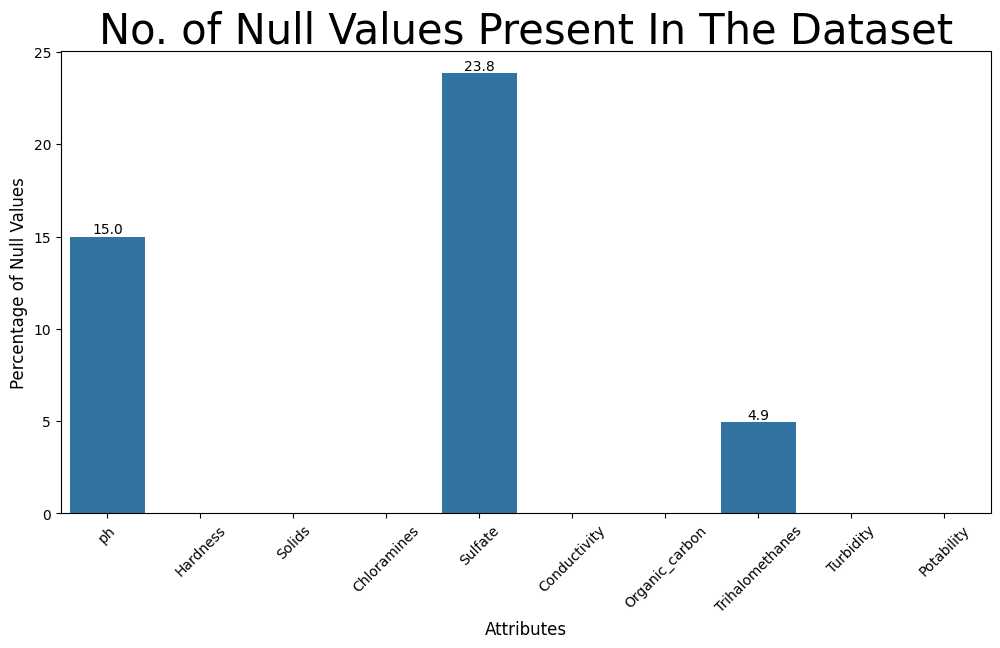

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

null_data = (data.apply(lambda x: x.isnull().value_counts()).T[True]/len(data)*100).reset_index(name = 'count')
fig = plt.figure(figsize = (12,6))
fig = sns.barplot(data = null_data, x = 'index', y = 'count')
fig.set_title("No. of Null Values Present In The Dataset", fontsize = 30)
fig.set_xlabel("Attributes", fontsize = 12)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45)
fig.set_ylabel("Percentage of Null Values", fontsize = 12)
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.show()

Here we used the matplotlib and the seaborn library of python to make a visualization that would give us insight about how many values are missing in our dataset in a persentage format to get a more meaningful scale on how much data is missing in different attributes. It is clear from the visualization that `Sulfate` has the most missing values when compared to all the missing values in different attributes which is 23.8%, the second highest is `ph` with 15% and the final attribute is `Trihalomethanes` with 4.9% null values.

We can also check the correlation of all the attributes with our target variable that is `Potability` to check which attribute or feature is contributing the most in determining the potability of water.

In [8]:
data.corr()['Potability']

ph                -0.003556
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.023577
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.007130
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64

Next lets fill in the null values that are present in the dataset by making use of imputation techniques. There are mainly 3 popular techniques that are used for imputing null values in a dataset they are Mean, Median, and Mode. Where Mode is mostly used when there are null values present in a categoriacal attribute. Mean is used when the data is normally distributed and is not skewed too much and it does not have that many outlier, Median is more robust to outliers as it does not take into consideration every value to create an imputer data. In our case we are gonna use Median as the imputation technique because sulfate values are usually more varied from one another that would make using Mean as an imputation technique cause problems. 

In [9]:
cl_data = data
cl_data['ph'].fillna(value = cl_data['ph'].median(), inplace = True)
cl_data['Sulfate'].fillna(value = cl_data['Sulfate'].median(), inplace = True)
cl_data['Trihalomethanes'].fillna(value = cl_data['Trihalomethanes'].median(), inplace = True)

In [10]:
cl_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
cl_data.to_csv("Clean_data.csv", index = False)

Now the data is transformed, processed, and clean it is ready for further analysis and modeling to make predictions.